<a href="https://colab.research.google.com/github/sratnaparkhi/Capstone-project/blob/main/multiclass_image_weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "sagarratnaparkhi" # username from the json file
os.environ['KAGGLE_KEY'] = "d0ada3a557f5ddcd8fc97e65901ab4ff" # key from the json file
#{"username":"sagarratnaparkhi","key":"d0ada3a557f5ddcd8fc97e65901ab4ff"}
!kaggle datasets download -d saurabhshahane/multi-class-weather-dataset

 80% 73.0M/91.3M [00:00<00:00, 107MB/s]
100% 91.3M/91.3M [00:00<00:00, 115MB/s]


In [ ]:
import tensorflow as tf
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import os

file_ref = zipfile.ZipFile('/content/multi-class-weather-dataset.zip','r')
file_ref.extractall()
file_ref.close()

In [ ]:
data_dir_list = os.listdir('/content/dataset2')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset2/dataset2"))
file_count = len(files)
print(file_count)

['dataset2']
1125


In [ ]:
# Lets create separation of dataset based on filename
import os
countOfClasses = {'cloudy' : 0  , 'rain' : 0 , 'shine':0 , 'sunrise':0}
CLOUDY = 'cloudy'
RAIN = 'rain'
SHINE = 'shine'
SUNRISE = 'sunrise'

listCloudy = []
listRain = []
listShine = []
listSunrise = []

for filenames in os.listdir('/content/dataset2/dataset2'):
  prefixPath = '/'
  if CLOUDY in str(filenames):
    countOfClasses[CLOUDY] += 1
    listCloudy.append(prefixPath + filenames)

  elif RAIN in str(filenames):
    countOfClasses[RAIN] +=1
    listRain.append(prefixPath + filenames)

  elif SHINE in str(filenames):
    countOfClasses[SHINE] +=1
    listShine.append(prefixPath + filenames)

  elif SUNRISE in str(filenames): 
    countOfClasses[SUNRISE] +=1
    listSunrise.append(prefixPath + filenames)

  #else: 
    #countOfClasses['na'] +=1

print(listSunrise)

['/sunrise331.jpg', '/sunrise240.jpg', '/sunrise258.jpg', '/sunrise105.jpg', '/sunrise207.jpg', '/sunrise298.jpg', '/sunrise265.jpg', '/sunrise206.jpg', '/sunrise308.jpg', '/sunrise233.jpg', '/sunrise290.jpg', '/sunrise356.jpg', '/sunrise227.jpg', '/sunrise129.jpg', '/sunrise289.jpg', '/sunrise271.jpg', '/sunrise95.jpg', '/sunrise277.jpg', '/sunrise242.jpg', '/sunrise199.jpg', '/sunrise72.jpg', '/sunrise243.jpg', '/sunrise21.jpg', '/sunrise269.jpg', '/sunrise223.jpg', '/sunrise311.jpg', '/sunrise333.jpg', '/sunrise94.jpg', '/sunrise189.jpg', '/sunrise232.jpg', '/sunrise69.jpg', '/sunrise275.jpg', '/sunrise332.jpg', '/sunrise336.jpg', '/sunrise327.jpg', '/sunrise212.jpg', '/sunrise283.jpg', '/sunrise352.jpg', '/sunrise301.jpg', '/sunrise219.jpg', '/sunrise200.jpg', '/sunrise114.jpg', '/sunrise201.jpg', '/sunrise250.jpg', '/sunrise4.jpg', '/sunrise25.jpg', '/sunrise74.jpg', '/sunrise160.jpg', '/sunrise139.jpg', '/sunrise110.jpg', '/sunrise176.jpg', '/sunrise216.jpg', '/sunrise41.jpg', '/

In [ ]:
import os
from shutil import copyfile

# function to split the data by number of training and test size for each class
def constructDataSet (directoryName, trainingSizePercent):
  rootPath = '/content/'+directoryName

  try : 
    print("TRY is working")
    os.mkdir(rootPath)
    os.mkdir(rootPath+'/training/')
    os.mkdir(rootPath+'/testing/')
  except OSError: 
    pass
  print("Exit Try ")
  # make a sub training and testing folder for each class 
  for keyValue in countOfClasses.keys(): 
    trainingPath = rootPath+'/training/'+keyValue
    testingPath = rootPath+'/testing/'+keyValue
    try :
      os.mkdir(trainingPath)
      os.mkdir(testingPath)
    except OSError: 
      pass

    
    # copy the files to the right folders 
    consideredList = eval('list'+ keyValue.capitalize())
    lenList = len(consideredList)
    traingSize = int( lenList * (trainingSizePercent/100) )
    #testSize = int(lenList - traingSize)
    
    # copying the files to the right path
    trainingFilePaths = consideredList[:traingSize] 
    testingFilePaths = consideredList[traingSize:]
    print(consideredList)
    exit()
    print(f" The considered class is : {keyValue} , Total list len { len(consideredList)} , train and test list {len (trainingFilePaths)} {len(testingFilePaths)}")
    for fileTrain in trainingFilePaths:
      currentFrom = '/content/dataset2/dataset2/' + fileTrain 
      currentDestination = trainingPath+ fileTrain 
      print(currentDestination)
      copyfile(currentFrom , currentDestination)

    for fileTest in testingFilePaths:
      currentFrom = '/content/dataset2/dataset2/' + fileTest 
      currentDestination = testingPath+ fileTest
      copyfile(currentFrom , currentDestination)




    

In [ ]:
TRAIN_PERCENT = 70
constructDataSet('weather-data',TRAIN_PERCENT)


TRY is working
Exit Try 
['/cloudy248.jpg', '/cloudy224.jpg', '/cloudy80.jpg', '/cloudy41.jpg', '/cloudy226.jpg', '/cloudy73.jpg', '/cloudy275.jpg', '/cloudy76.jpg', '/cloudy289.jpg', '/cloudy157.jpg', '/cloudy281.jpg', '/cloudy22.jpg', '/cloudy158.jpg', '/cloudy170.jpg', '/cloudy60.jpg', '/cloudy13.jpg', '/cloudy103.jpg', '/cloudy276.jpg', '/cloudy1.jpg', '/cloudy202.jpg', '/cloudy232.jpg', '/cloudy283.jpg', '/cloudy75.jpg', '/cloudy239.jpg', '/cloudy218.jpg', '/cloudy38.jpg', '/cloudy279.jpg', '/cloudy125.jpg', '/cloudy2.jpg', '/cloudy146.jpg', '/cloudy261.jpg', '/cloudy199.jpg', '/cloudy151.jpg', '/cloudy107.jpg', '/cloudy207.jpg', '/cloudy225.jpg', '/cloudy259.jpg', '/cloudy234.jpg', '/cloudy280.jpg', '/cloudy86.jpg', '/cloudy57.jpg', '/cloudy138.jpg', '/cloudy290.jpg', '/cloudy29.jpg', '/cloudy145.jpg', '/cloudy177.jpg', '/cloudy274.jpg', '/cloudy5.jpg', '/cloudy48.jpg', '/cloudy267.jpg', '/cloudy16.jpg', '/cloudy183.jpg', '/cloudy78.jpg', '/cloudy193.jpg', '/cloudy27.jpg', '/clou

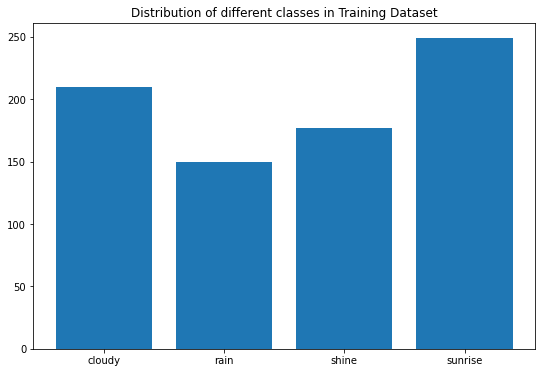

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import os

image_folder = ['cloudy', 'rain', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/training/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['cloudy','rain', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/training/'+i+'/'))))

Training cloudy images are: 210
Training rain images are: 150
Training shine images are: 177
Training sunrise images are: 249


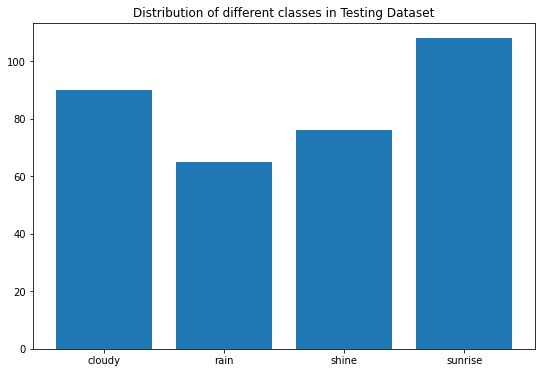

Training cloudy images are: 90
Training rain images are: 65
Training shine images are: 76
Training sunrise images are: 108


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import os

image_folder = ['cloudy', 'rain', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/testing/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.show()
for i in ['cloudy','rain', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/testing/'+i+'/'))))

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

img_width=256
img_height=256
batch_size=16

In [ ]:
TRAINING_DIR = '/content/weather-data/training/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 786 images belonging to 4 classes.


In [ ]:
TESTING_DIR = '/content/weather-data/testing/'
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 339 images belonging to 4 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
50/50 [==============================] - 96s 2s/step - loss: 1.3092 - accuracy: 0.4427 - val_loss: 1.2624 - val_accuracy: 0.3215
Epoch 2/30
50/50 [==============================] - 94s 2s/step - loss: 0.9337 - accuracy: 0.5216 - val_loss: 0.8574 - val_accuracy: 0.5605
Epoch 3/30
50/50 [==============================] - 94s 2s/step - loss: 0.8887 - accuracy: 0.5827 - val_loss: 0.9047 - val_accuracy: 0.5664
Epoch 4/30
50/50 [==============================] - 94s 2s/step - loss: 0.8523 - accuracy: 0.6018 - val_loss: 0.8471 - val_accuracy: 0.5634
Epoch 5/30
50/50 [==============================] - 94s 2s/step - loss: 0.8579 - accuracy: 0.5725 - val_loss: 0.8355 - val_accuracy: 0.5664
Epoch 6/30
50/50 [==============================] - 94s 2s/step - loss: 0.8240 - accuracy: 0.6158 - val_loss: 0.6351 - val_accuracy: 0.7286
Epoch 7/30
50/50 [==============================] - 94s 2s/step - loss: 0.8119 - accuracy: 0.6145 - val_loss: 0.8077 - val_accuracy: 0.5693
Epoch 8/30
50/50 [==

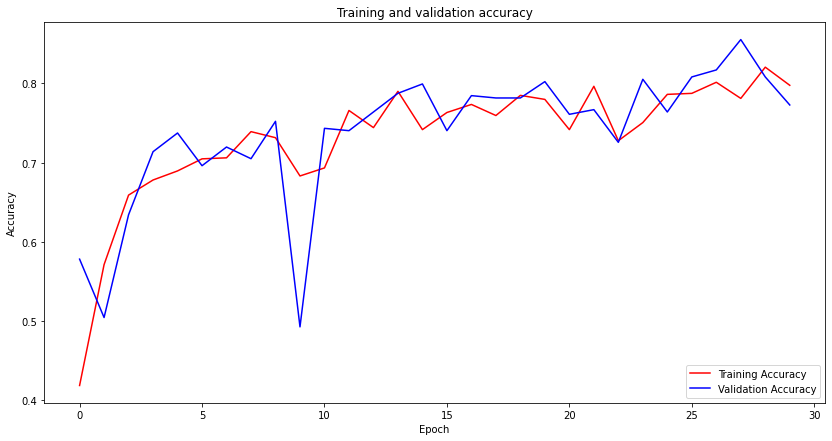

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

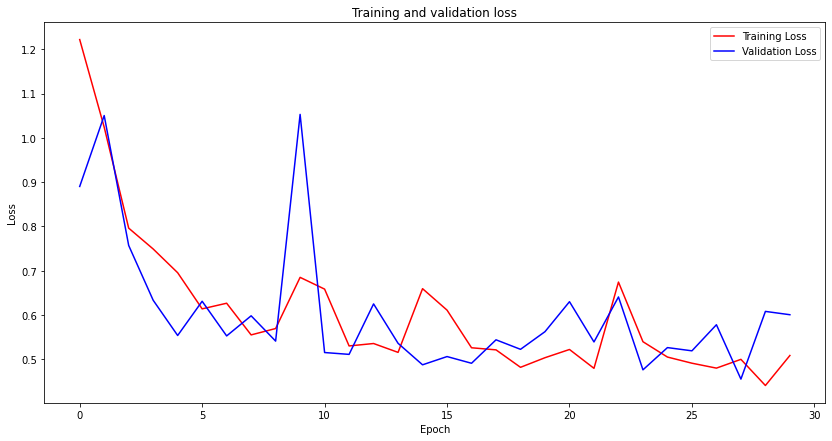

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')